In [1]:
# 1. Load and scale data
import pandas as pd
stk_data = pd.read_csv("Tatacoffee13_21.csv")
column = "Close"

In [2]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])
print("Len:", data1.shape)

Len: (2225, 1)


In [3]:
# Split into train-test (80-20)
training_size = int(len(data1) * 0.8)
X_train = data1[:training_size]
y_test = data1[training_size:]
print("X_train length:", len(X_train))
print("y_test length:", len(y_test))

X_train length: 1780
y_test length: 445


In [9]:
# Different (p,d,q) and values to test
orders = [(1, 0, 1), (1, 1, 1), (2, 1, 1), (1, 0, 2)]


In [11]:
for i in orders:
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(X_train, order=i)
    model_fit = model.fit()
       # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    
    

RMSE-Testset: 0.0326204747728486
maPe-Testset: 31593712545.415627
RMSE-Testset: 0.033321580346107334
maPe-Testset: 22048828953.01917
RMSE-Testset: 0.03327614684992973
maPe-Testset: 22361385274.054317
RMSE-Testset: 0.03270855001870372
maPe-Testset: 31674580182.955654


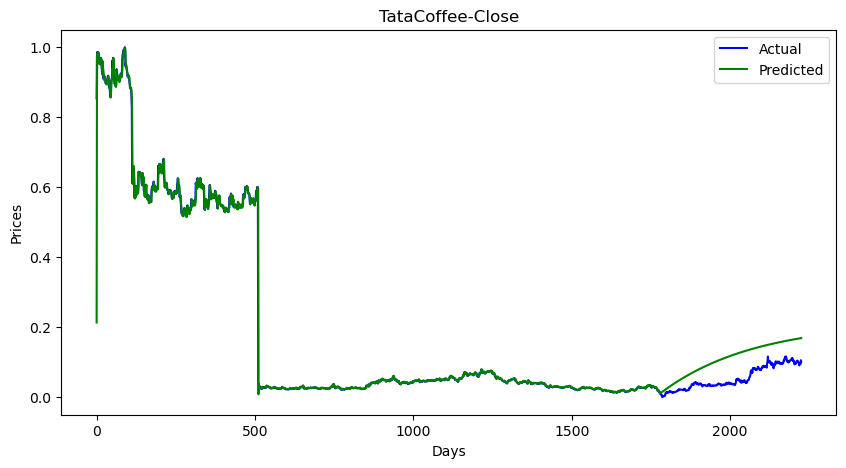

In [13]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [14]:
len(data1)

2225

In [15]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [16]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

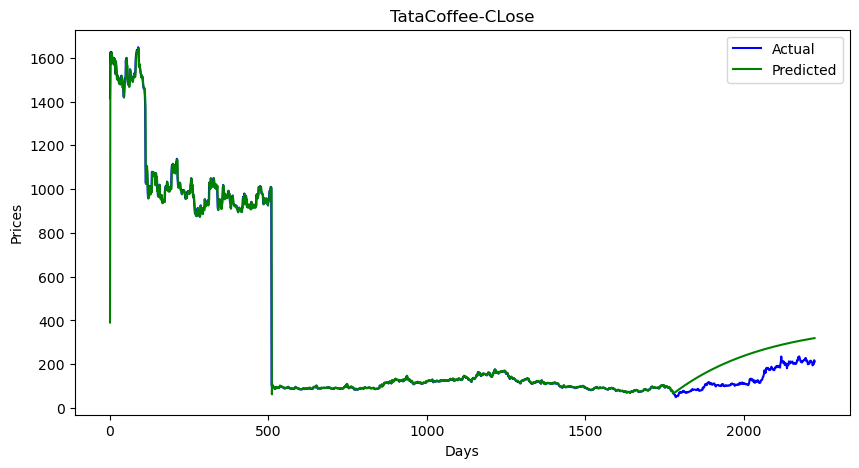

In [17]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [18]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 52.29442976990351
maPe-Testset: 0.15472450008978125


In [19]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [20]:
forecast

array([0.16900837, 0.16915922, 0.16930956, 0.16945938])

In [21]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [22]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [23]:
forecast_stock_price_test_oriF

,Closefore
0,319.610587
1,319.851763
2,320.092119
3,320.33166
